In [1]:
from src import *
import warnings
warnings.filterwarnings("ignore")


## Table of Contents
- [Ranking regions by displacement](#ranking)

In [2]:
moviename = 'Chatter'

# Loading Gradient Example
G_movie, V_movie = load('./resources/dynamic_grad/group_level/{}_40_grad.pkl'.format(moviename)) 
G_rest, V_rest   = load('./resources/dynamic_grad/group_level/Rest_40_grad.pkl') 

G_rest   = np.asarray(procrustes_align(G_rest, ref= G_rest[0])[0])
G_movies = np.asarray(procrustes_align(G_movie, ref= G_rest[0])[0])


# Loading Matching Emotion Track
full_df  = pd.read_csv('./data/emoFiles/emotion_compile.csv')
emo_df   = full_df[full_df['filename']=='W_{}13.csv'.format(moviename)]
other_df = full_df[full_df['filename']!='W_{}13.csv'.format(moviename)]

networks  = list(index2region.keys())
nbr       = len(networks)

## Cortical visualization of functional connectivity displacement
We track each projected regions in the 2d/3d manifold that its gradients define and then visualize its value on a corresponding cortical representation

In [5]:
d_movie = mean_region_motion(G_movie[:,:,[0,1]])
d_rest  = mean_region_motion(G_rest[:,:,[0,1]])

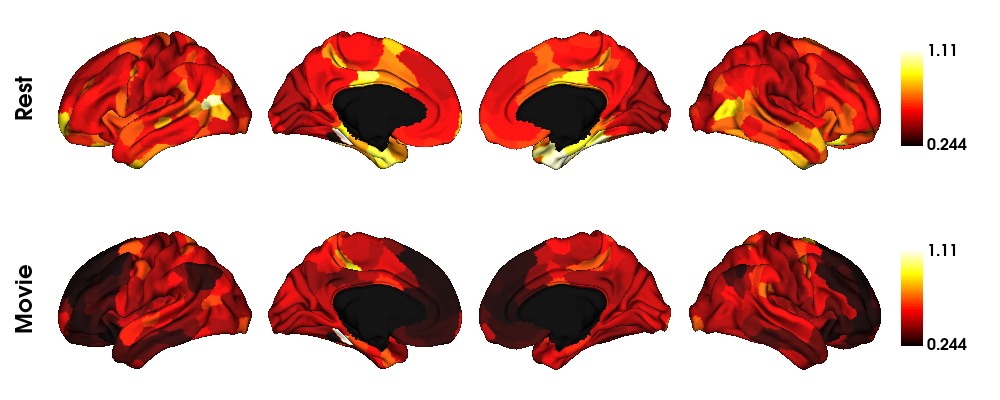

In [17]:
# For a single movie: plots correlation of parcels versus emotions series
labeling         = load_parcellation('schaefer', scale=400, join=True)
surf_lh, surf_rh = load_conte69()
mask = labeling != 0

gs   = np.stack([d_rest,d_movie])

grad = [None] * 2
for k in range(gs.shape[0]):
    # map the gradient to the parcels
    gs[k][0]   = gs.min()
    gs[k][1]   = gs.max()
    grad[k] = map_to_labels(gs[k], labeling, mask=mask, fill=np.nan)

plot_hemispheres(surf_lh, surf_rh, array_name=grad, size=(1000, 400), cmap='hot',
                 color_bar=True, label_text=['Rest', 'Movie'], zoom=1.25, embed_nb=True, interactive=False,
                 transparent_bg=False)


<a class="anchor" id="ranking"></a>
## Ranking Regions by Displacement
We track each projected regions in the 2d/3d manifold that its gradients define and then rank it compared to other regions' tracking.

####  Look at motion from joint plot

In [16]:
# subj_grad  = deepcopy(G_rest)
# movie_name = "Rest"
# partial_region = load('./resources/region400yeo7.pkl')
# coloring  = [partial_region[i] for i in range(400)]
# pal       = sns.color_palette('colorblind', 8)

# for j in tqdm(range(len(subj_grad))):
#     tmp_df = {"G1":subj_grad[j][:,0] , "G2": subj_grad[j][:,1], "region": coloring}
#     tmp_df = pd.DataFrame.from_dict(tmp_df)
#     ax     = sns.jointplot(data=tmp_df, x="G1", y="G2", 
#                 hue="region", height=7, 
#                 xlim=(subj_grad[:,:,0].min()-10,subj_grad[:,:,0].max()+10), 
#                 ylim=(subj_grad[:,:,1].min()-10,subj_grad[:,:,1].max()+10), palette=pal)
#     ax.fig.suptitle("Gradients's closenedness plot ({})".format(movie_name.split('_')[0]), fontsize=12)
#     legend_properties = {'weight':'bold','size':5}
#     ax.ax_joint.legend(prop=legend_properties,loc='upper right')
#     ax.ax_joint.set_xlabel('G1',fontsize=10)
#     ax.ax_joint.set_ylabel('G2',fontsize=10)
#     ax.savefig("./media/gradient_plots/{}_{}.jpg".format(movie_name.split('_')[0],j))

#     #this is the line to be added to avoid showing all the list of plots
#     plt.close("all")

100%|██████████| 343/343 [02:03<00:00,  2.79it/s]


In [39]:
# path = "./media/gradient_plots/"

# # reorder saved images path
# movie_path  = loadimg_in_order([m for m in os.listdir(path)])
# movie_array = [cv2.imread(path+'/'+filename) for filename in movie_path if movie_name in filename]

# img2video(movie_array, 10, outpath_name='./media/{}_plots_ws{}.mp4'.format(movie_name.split('_')[0],40))

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Check values

In [18]:
d_movie = mean_region_motion(G_movie[:,:,[0,1]])
d_rest  = mean_region_motion(G_rest[:,:,[0,1]])

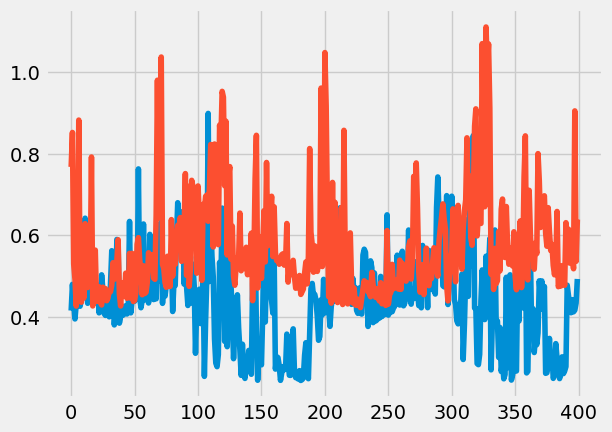

In [19]:
plt.plot(d_movie)
plt.plot(d_rest)

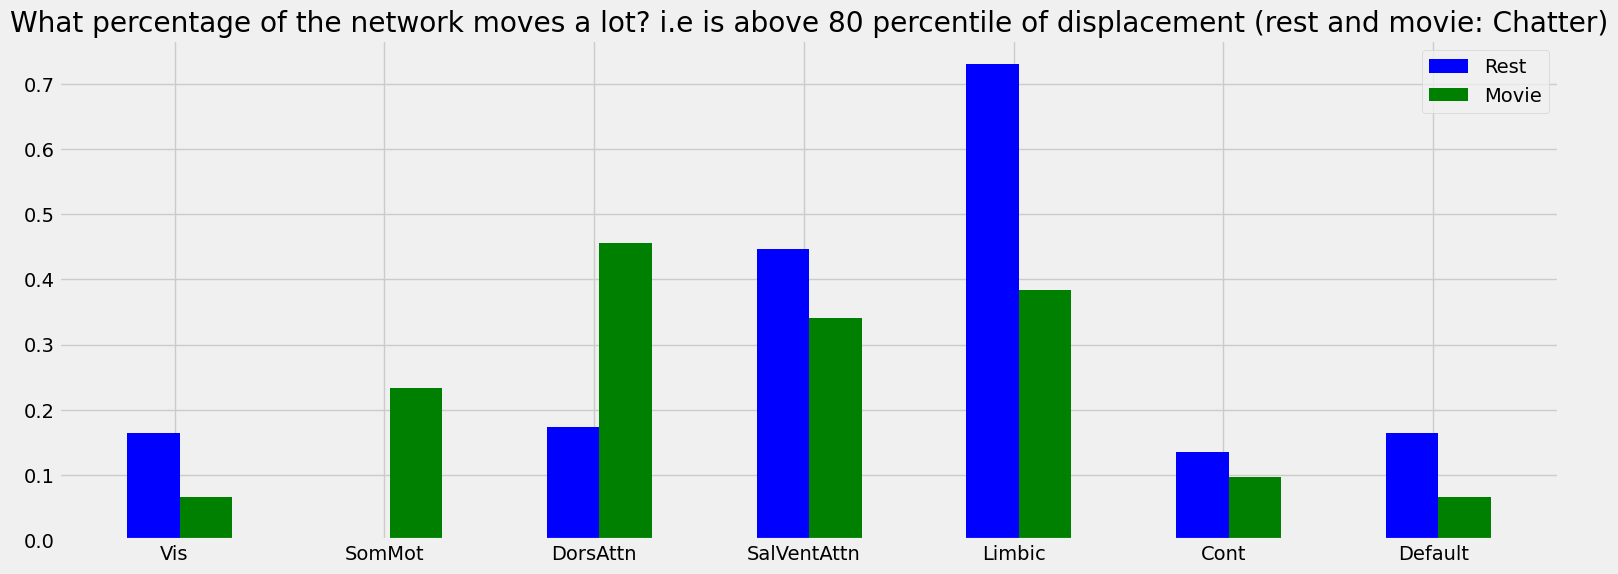

In [39]:
networks = list(index2region.keys())

threshed_movie = d_movie > np.percentile(d_movie, 80)
threshed_rest  = d_rest > np.percentile(d_rest, 80)

percentage_movie = [np.mean(threshed_movie[index2region[n]]) for n in networks]
percentage_rest  = [np.mean(threshed_rest[index2region[n]]) for n in networks]
 


X = np.arange(len(networks))
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, percentage_rest, color = 'b', width = 0.25,label='Rest')
ax.bar(X + 0.25, percentage_movie, color = 'g', width = 0.25,label='Movie')
ax.set_xticks(X+0.1, networks)
ax.legend()
ax.set_title('What percentage of the network moves a lot? i.e is above 80 percentile of displacement (rest and movie: {})'.format(moviename))

plt.show()